## Датасет собран из базы данных переписи 1994 года и содержит данные о доходах.
### Информация о данных:
* age: continuous.
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt: continuous.
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, * Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num: continuous.
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: continuous.
* capital-loss: continuous.
* hours-per-week: continuous.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
* salary: >50K,<=50K

## Проведите анализ данных при помощи Pandas выполнив поставленные задачи.
#### 

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# загружаем датасет
data = pd.read_csv("./data/adult.data.csv")
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**1. Посчитайте, сколько мужчин и женщин (признак *sex*) представлено в этом датасете**

In [6]:
# count_male = data[data['sex'] == 'Male']['sex'].count()

# count_male = data['sex'].value_counts()


In [80]:
count_male = data['sex'].value_counts()['Male']
count_female = data['sex'].value_counts()['Female']

print(f'Количество мужчин - {count_male}')
print(f'Количество женщин - {count_female}')

Количество мужчин - 21790
Количество женщин - 10771


**2. Каков средний возраст мужчин (признак *age*) по всему датасету?**

In [81]:
# average_age_man = data[data['sex'] == 'Male']['age'].mean()
# average_age_man = data[data.sex == 'Male']['age'].mean()
# average_age_man = data[data.sex == 'Male'].age.mean()
             
average_age_man = data.query('sex == "Male"')['age'].mean()
print(f'Средний возраст мужчин - {average_age_man} лет')

Средний возраст мужчин - 39.43354749885268 лет


**3. Какова доля граждан Соединенных Штатов (признак *native-country*)?**

In [82]:
native_country_usa = data.query('`native-country` == "United-States"')['native-country'].count() \
/ len(data)

print(f'Доля граждан Соединенных Штатов {native_country_usa}')

Доля граждан Соединенных Штатов 0.895857006848684


**4-5. Рассчитайте среднее значение и среднеквадратичное отклонение возраста тех, кто получает более 50K в год (признак *salary*) и тех, кто получает менее 50K в год**

In [10]:
result1 = data.groupby('salary', as_index = False)['age'].agg(['mean', 'std'])
result1 = result1.rename(columns={'salary': 'Заработная плата','mean': 'Средний возраст', 'std': 'Стандартное отклонение возраста'})
result1

,Заработная плата,Средний возраст,Стандартное отклонение возраста
0,<=50K,36.783738,14.020088
1,>50K,44.249841,10.519028


**6. Правда ли, что люди, которые получают больше 50k, имеют минимум высшее образование? (признак *education – Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters* или *Doctorate*)**

In [35]:
result2 = data[data.salary == '>50K'].groupby('education', as_index = False)['salary'].count() 
result2    # Распределение образования среди людей с зп больше 50К


,education,salary
0,10th,62
1,11th,60
2,12th,33
3,1st-4th,6
4,5th-6th,16
5,7th-8th,40
6,9th,27
7,Assoc-acdm,265
8,Assoc-voc,361
9,Bachelors,2221


**7. Выведите статистику возраста для каждой расы (признак *race*) и каждого пола. Используйте *groupby* и *describe*. Найдите таким образом максимальный возраст мужчин расы *Asian-Pac-Islander*.**

In [62]:
result3 = data.groupby(['race', 'sex'])['age'].describe()
result3

count       mean        std   min   25%   50%  \
race               sex                                                       
Amer-Indian-Eskimo Female    119.0  37.117647  13.114991  17.0  27.0  36.0   
                   Male      192.0  37.208333  12.049563  17.0  28.0  35.0   
Asian-Pac-Islander Female    346.0  35.089595  12.300845  17.0  25.0  33.0   
                   Male      693.0  39.073593  12.883944  18.0  29.0  37.0   
Black              Female   1555.0  37.854019  12.637197  17.0  28.0  37.0   
                   Male     1569.0  37.682600  12.882612  17.0  27.0  36.0   
Other              Female    109.0  31.678899  11.631599  17.0  23.0  29.0   
                   Male      162.0  34.654321  11.355531  17.0  26.0  32.0   
White              Female   8642.0  36.811618  14.329093  17.0  25.0  35.0   
                   Male    19174.0  39.652498  13.436029  17.0  29.0  38.0   

                             75%   max  
race               sex                  
Amer-Indian-Eskimo Female  46.00  80.0  
                   Male    45.00  82.0  
Asian-Pac-Islander Female  43.75  75.0  
                   Male    46.00  90.0  
Black              Female  46.00  90.0  
                   Male    46.00  90.0  
Other              Female  39.00  74.0  
                   Male    42.00  77.0  
White              Female  46.00  90.0  
                   Male    49.00  90.0

**8. Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак *marital-status*)? Женатыми считаем тех, у кого *marital-status* начинается с *Married* (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми.**

In [13]:
# Создаем новую колонку с обобщенными группами статуса
data_copy = data.copy()
def group_marital_status(x):
    if 'Married' in x:
        return 'Married'
    else:
        return 'Not married'
data_copy['mar_status'] = data_copy['marital-status'].apply(group_marital_status)
data_copy.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,mar_status
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,Not married
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,Married
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,Not married
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,Married
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,Married


In [15]:
#Количество женатых и неженптых мужчин с зп больше 50К
rich_man = data_copy[(data_copy.salary == '>50K') & (data_copy.sex == 'Male')].groupby('mar_status')['mar_status'].count() 

#Количество женатых и неженптых мужчин всего
all_man = data_copy[data_copy.sex == 'Male'].groupby('mar_status')['mar_status'].count() 

# Доля богатых мужчин среди женатых и неженатых
rich_man_percen = rich_man / all_man
rich_man_percen

mar_status
Married        0.440514
Not married    0.084495
Name: mar_status, dtype: float64

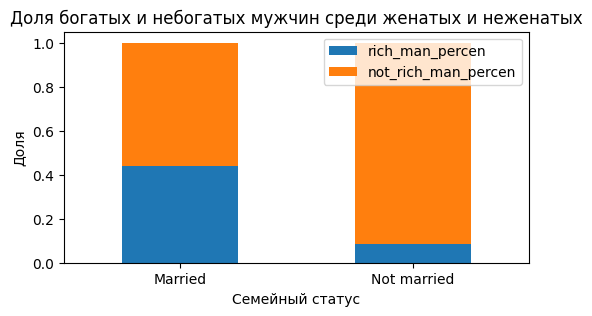

In [25]:
# Построение диаграммы

not_rich_man_percen = 1 - rich_man_percen

# Создание DataFrame для построения графика
df = pd.DataFrame({'rich_man_percen': rich_man_percen, 'not_rich_man_percen': not_rich_man_percen})

# Построение столбчатой диаграммы
ax = df.plot(kind='bar', stacked=True, figsize=(6, 3))
ax.set_xticklabels(df.index, rotation=0)  # Установка меток по оси x без поворота
plt.title('Доля богатых и небогатых мужчин среди женатых и неженатых')
plt.xlabel('Семейный статус')
plt.ylabel('Доля')
plt.show()

**9. Какое максимальное число часов человек работает в неделю (признак *hours-per-week*)? Сколько людей работают такое количество часов и каков среди них процент зарабатывающих много?**

In [36]:
max_hours = data['hours-per-week'].max()
print(f'Максимальное число часов работы в неделю - {max_hours}')

people_count = data[data['hours-per-week'] == max_hours]['hours-per-week'].count()

rich_people_count = data[(data['hours-per-week'] == max_hours) & (data['salary'] == '>50K')]['hours-per-week'].count()

print(f'''\
{people_count} людей работают {max_hours} часов в неделю,
из них {round(rich_people_count / people_count * 100, 1)}% зарабатывают более 50К, {round((1-rich_people_count / people_count) * 100, 1)}% зарабатывают менее 50К
''')



Максимальное число часов работы в неделю - 99
85 людей работают 99 часов в неделю,
из них 29.4% зарабатывают более 50К, 70.6% зарабатывают менее 50К



**10. Посчитайте среднее время работы (*hours-per-week*) зарабатывающих мало и много (*salary*) для каждой страны (*native-country*).**

In [78]:
average_hours = data.groupby(['native-country', 'salary'])['hours-per-week'].mean().unstack()
print(average_hours)

salary                          <=50K       >50K
native-country                                  
?                           40.164760  45.547945
Cambodia                    41.416667  40.000000
Canada                      37.914634  45.641026
China                       37.381818  38.900000
Columbia                    38.684211  50.000000
Cuba                        37.985714  42.440000
Dominican-Republic          42.338235  47.000000
Ecuador                     38.041667  48.750000
El-Salvador                 36.030928  45.000000
England                     40.483333  44.533333
France                      41.058824  50.750000
Germany                     39.139785  44.977273
Greece                      41.809524  50.625000
Guatemala                   39.360656  36.666667
Haiti                       36.325000  42.750000
Holand-Netherlands          40.000000        NaN
Honduras                    34.333333  60.000000
Hong                        39.142857  45.000000
Hungary             

**11.Сгруппируйте людей по возрастным группам *young*, *adult*, *retiree*, где:**
* *young* соответствует 16-35 лет
* *adult* - 35-70 лет
* *retiree* - 70-100 лет

**Проставьте название соответсвтуещей группы для каждого человека в новой колонке AgeGroup**

In [44]:
def group_age(x):
    if 16 <= x <= 35:
        return 'young'
    elif 36 <= x <= 70:
        return 'adult'
    elif 71 <= x <= 100:
        return 'retiree'
    else:
        return 'unknown'
data['AgeGroup'] = data['age'].apply(group_age)
data.head()
 

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,AgeGroup
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,adult
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,adult
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,adult
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,adult
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,young


**12-13. Определите количество зарабатывающих >50K в каждой из возрастных групп (колонка AgeGroup), а также выведите название возрастной группы, в которой чаще зарабатывают больше 50К (>50K)**

In [59]:
big_salary = data[data.salary == '>50K'].groupby('AgeGroup')['AgeGroup'].count() 

salary = data.groupby('AgeGroup')['AgeGroup'].count() 

salary_persent = big_salary / salary

expensive_group = salary_persent.idxmax()


print(f'''\
Количество зарабатывающих >50K в каждой из возрастных групп:
{big_salary}''')

print(f'''\n
Доля зарабатывающих >50K в каждой из возрастных групп:
{salary_persent}''')

print(f'\nНазвание возрастной группы, в которой чаще зарабатывают больше 50К: {expensive_group}')

Количество зарабатывающих >50K в каждой из возрастных групп:
AgeGroup
adult      6042
retiree      94
young      1705
Name: AgeGroup, dtype: int64


Доля зарабатывающих >50K в каждой из возрастных групп:
AgeGroup
adult      0.353416
retiree    0.174074
young      0.114238
Name: AgeGroup, dtype: float64

Название возрастной группы, в которой чаще зарабатывают больше 50К: adult


**14. Сгруппируйте людей по типу занятости (колонка occupation) и определите количество людей в каждой группе. После чего напишите функциюю фильтрации filter_func, которая будет возвращать только те группы, в которых средний возраст (колонка age) не больше 40 и в которых все работники отрабатывают более 5 часов в неделю (колонка hours-per-week)**

In [77]:
occupation_count = data.groupby('occupation')['occupation'].count()   # occupation_count = data.groupby('occupation').size()
print(f'Количество людей по типу занятости: \n{occupation_count}')


def filter_func(x):
    mean_age = x['age'].mean()
    min_hours = x['hours-per-week'].min()
    return mean_age <= 40 and min_hours > 5

# Фильтруем группы
filtered_groups = data.groupby('occupation').filter(filter_func)

print(f'\n\nГруппы, удовлетворяющие условиям: \n{filtered_groups}')
   

Количество людей по типу занятости: 
occupation
?                    1843
Adm-clerical         3770
Armed-Forces            9
Craft-repair         4099
Exec-managerial      4066
Farming-fishing       994
Handlers-cleaners    1370
Machine-op-inspct    2002
Other-service        3295
Priv-house-serv       149
Prof-specialty       4140
Protective-serv       649
Sales                3650
Tech-support          928
Transport-moving     1597
Name: occupation, dtype: int64


Группы, удовлетворяющие условиям: 
       age    workclass  fnlwgt     education  education-num  \
442     24  Federal-gov  191073       HS-grad              9   
1300    29  Federal-gov  301010  Some-college             10   
14613   39  Federal-gov  227597       HS-grad              9   
16111   24  Federal-gov  287988     Bachelors             13   
18034   34  Federal-gov  172716          12th              8   
18644   23  Federal-gov  163870  Some-college             10   
18769   30  Federal-gov   76313       HS-grad 